# Classification using Perceptrons

<img style="float: left;" width="600" src="images/brain.jpg">

## Perceptron

* In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers
* It is one of the first atempts to create an Artificial Neural Network
* Invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt
* It is a type of linear classifier (a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector)

    \begin{equation} \mathbf {w} \cdot \mathbf {x} +b \end{equation} 

<img style="float: left;" width="600" src="images/perceptron_node.png">

#### Activation function

* The output of a perceptron is a linear function of the input
    * However, we want only to trigger the neuron when some condition is fulfilled (that is how our brain works)
    * The activation function allows to mimic that behavior, avoiding -inf/+inf as output
* In artificial neural networks, the activation function is a equation that defines the output of that node given an input or set of inputs
* For the perceptron, activation function is defined as:
$f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}$

* where $\mathbf {w}$  is a vector of real-valued weight and $b$ is the bias. 

    * The bias shifts the decision boundary away from the origin

* Alternative activation functions:
    * Sigmoid or Logistic
    * Tanh — Hyperbolic tangent
    * ReLu -Rectified linear units
    

In [1]:
import numpy as np # package for scientific computing in Python (similar to Matlab)
import pandas as pd

def perceptron(x, w, b):
    # perceptron function for a single example
    linear_output = (np.dot(x, w) + b) # np.dot is the dot product
    
    if linear_output > 0.0:
        activation = 1
    else:
        activation = 0
    return activation

def prediction(x, w, b):
    # the prediction function consists in computing the perceptron prediction for each given example
    y_hat = np.array([])
    for x_i in x.values:
        y_hat = np.append(y_hat, perceptron(x_i, w, b))
    return y_hat

### Training

* Training a perceptron means updating the weight and bias vectors in order to minimize the loss function
* The minimization can be achieved by using gradient descent
    * in terms of weight vector: \begin{equation} \mathbf{w}' = \mathbf{w} + \alpha (y - \hat{y}) * x\end{equation}
    * in terms of bias: \begin{equation} \mathbf{b}' = \mathbf{b} + \alpha (y - \hat{y}) \end{equation}
* Epoch is a single algorithmic run though all the examples in the dataset
* Sometimes training just once is not enough to fit the model
* To guarantee convergence, it is usual to train neural networks using several epochs

In [2]:
def perceptron_train(x, y, learning_rate = 0.01, epochs = 50):
    # (x, y) is the set of training examples
    n_features = x.shape[1] # number of input features
    w = np.zeros(n_features) # initialization of weight vector with zeros
    b = 0 # bias
    for e in range(epochs):
        for x_i, y_i in zip(x, y):
            y_hat = perceptron(x_i, w, b) # the model prediction for this input example
            w = w + learning_rate * (y_i - y_hat) * x_i # update weights
            b = b + learning_rate * (y_i - y_hat) # update bias
    return (w, b)

## Iris dataset

* This data sets consists of 3 different types of irises’ petal and sepal length
* Introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *"The use of multiple measurements in taxonomic problem"*
* Dimension: 150x4 (150 examples, 4 features)
* Features: Sepal Length, Sepal Width, Petal Length and Petal Width.
* Output: Iris' type (Setosa, Versicolour, and Virginica)

<img style="float: left;" width="600" src="images/iris_dataset.png">

In [3]:
# load dataset and convert to pandas dataframe
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['type'] = iris.target

df.sample(5) #sample 10 random rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
63,6.1,2.9,4.7,1.4,1
120,6.9,3.2,5.7,2.3,2
80,5.5,2.4,3.8,1.1,1
42,4.4,3.2,1.3,0.2,0
148,6.2,3.4,5.4,2.3,2


#### Adequate output

* We must remember that the perceptron design assumed binary classification
* To adequate the dataset, we can remove one of the output classes
* The result will be a datased with examples for two different Iris species
    * i.e, a binary target that will work with our perceptron

In [4]:
print('Output classes before removal:', df['type'].unique())

df = df[df['type'] != 2].reset_index(drop=True)

print('Output classes before removal:', df['type'].unique())

x = df.drop('type', axis = 1) # input is the features without Iris species (type)
y = df['type'] # output is the Iris specie

Output classes before removal: [0 1 2]
Output classes before removal: [0 1]


## Now we can train and compare the results

* Splitting into training and testing sets is important for a better evaluation
    * Avoid misinterpretation due to overfitting
* However, the train will be done using the whole dataset
    * The idea is only to show the algorithm working, and not to evaluate the results

In [5]:
# train the perceptron
alpha = 0.1 # learning_rate

# the training result is basically the weight vector and the bias
(w, b) = perceptron_train(x.values, y.values, alpha, epochs = 20) 

# use the perceptron to predict the irises' types
prediction_df = x
y_hat = prediction(prediction_df, w, b)
prediction_df['type'] = y_hat

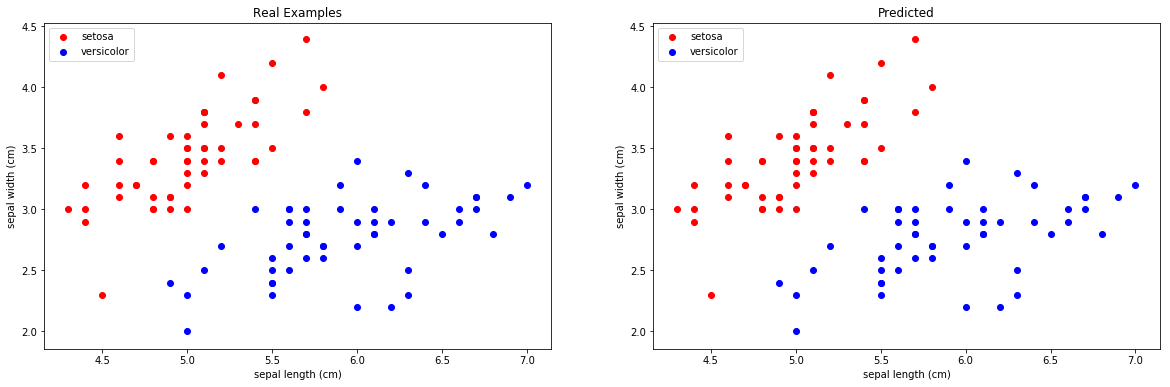

In [6]:
import matplotlib.pyplot as plt #plotting library
%matplotlib inline

plt.figure(figsize=(20, 6))

for df, title, plot_number in [(df, 'Real Examples', 1), (prediction_df, 'Predicted', 2)]:
    plt.subplot(1, 2 , plot_number)
    temp = df[df['type'] == 0]
    plt.scatter(temp.iloc[:,0], temp.iloc[:,1], c='red', label='setosa')
    temp = df[df['type'] == 1]
    plt.scatter(temp.iloc[:,0], temp.iloc[:,1], c='blue', label='versicolor')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(title)
    plt.legend(loc=2)